In [1]:
import numpy as np
from matplotlib import pyplot as plt

def theta_from_temp(temp,press):
    """
       Input: temp (K)
               press (kPa)
       Output: theta (K)
       Thompkins eq. 1.38
    """
    cpd=1004. #J/kg/K
    Rd = 287.  # J/kg/K
    p0 = 100   #kPa
    theta = temp*(p0/press)**(Rd/cpd)
    return theta


def press_from_temp_theta(temp,theta):
    """
       Input: temp (K)
              theta (K)
       Output: press (kPa)
       Thompkins eq. 1.38
    """
    cpd=1004. #J/kg/K
    Rd = 287.  # J/kg/K
    p0 = 100   #kPa
    press = p0*(temp/theta)**(cpd/Rd)
    return press

## Print three isobars on a (temp,theta) grid

In [2]:
press=[100,80,60]  #our isobars
temp=np.linspace(250,300,40)  #temperature range
save_lines=[]
for the_press in press:
    save_lines.append(theta_from_temp(temp,the_press))

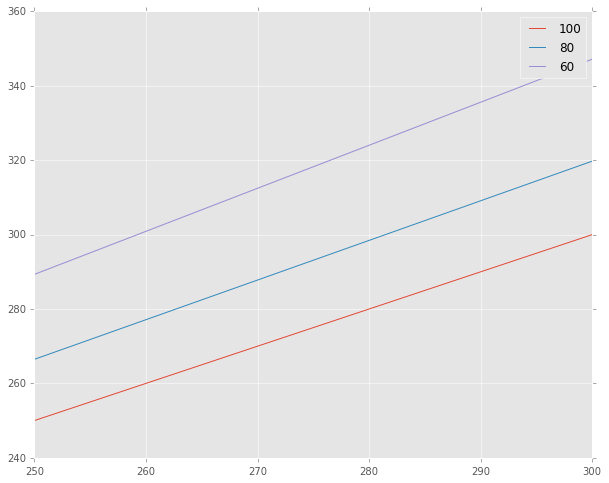

In [3]:
%matplotlib inline
pairs=zip(press,save_lines)
plt.style.use('ggplot')
fig,ax=plt.subplots(1,1,figsize=(10,8))
for the_press,theta in pairs:
    ax.plot(temp,theta,label=the_press)
out=ax.legend()

### Now repeat using the matplotlib contour function

Instead of plotting three isobars, make a grid of pressure values and then put
down 3 contour lines on that grid.  Write the contour labels over the lines

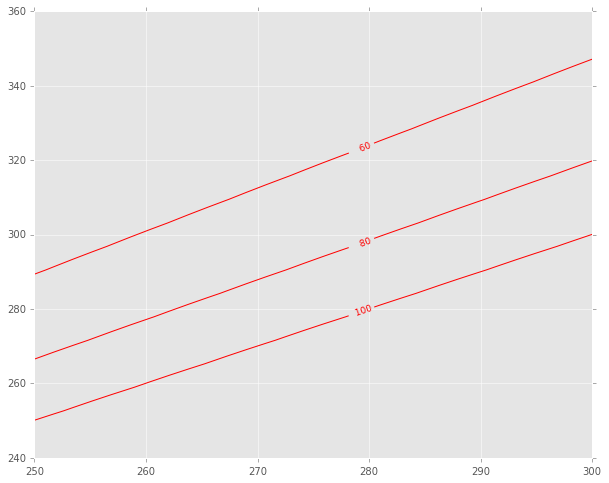

In [4]:
plt.style.use('ggplot')
grid=np.empty([20,30])  #make this 20 rows (yaxis) with 30 columns (xaxis)
temp_vals=np.linspace(250,300,30)
theta_vals=np.linspace(240,360,20)
rows,cols=grid.shape
for i in range(rows):
    for j in range(cols):
        grid[i,j]=press_from_temp_theta(temp_vals[j],theta_vals[i])
        #print(i,j,temp_vals[j],theta_vals[i],grid[i,j])
fig,ax=plt.subplots(1,1,figsize=(10,8))
press_labels=[60,80,100]
presslevs=ax.contour(temp_vals,theta_vals,grid,press_labels,colors='r')
fntsz = 9 # Handle for 'fontsize' of the line label.
ovrlp = True # Handle for 'inline'. Any integer other than 0
                # creates a white space around the label.
out=presslevs.clabel(press_labels, inline_spacing=0, 
                     inline=ovrlp, fmt='%5d', fontsize=fntsz,use_clabeltext=True)
